linear regression,ridge regression,lasso regression,elastic net, support vector regression

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption   
    
    

In [ ]:
###    Classification: logistic regression,SVM(kernel)
##   https://archive.ics.uci.edu/ml/datasets/Census+Income

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
        
df=pd.read_csv('D:\ineuron\EDA _Dataset\Dataset\Data13\household_power_consumption.txt',sep=";")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [4]:
df.shape

(2075259, 9)

#### Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


Attribute Information:

1.date: Date in format dd/mm/yyyy
2.time: time in format hh:mm:ss
3.global_active_power: household global minute-averaged active power (in kilowatt)
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5.voltage: minute-averaged voltage (in volt)
6.global_intensity: household global minute-averaged current intensity (in ampere)
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
# import random 
import random
### take nearly 51882 samples
df1=df.sample(n=50000)



In [8]:
df1.shape

(50000, 9)

In [9]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,50000,1442,16/10/2009,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,50000,1440,02:06:00,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_active_power,50000,3212,?,609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_reactive_power,50000,524,0.000,11333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voltage,50000,2876,?,609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_intensity,50000,257,1.000,4001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_1,50000,97,0.000,44341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_2,50000,83,0.000,33899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_3,49391.0,NaN,NaN,NaN,6.438724,8.428308,0.0,0.0,1.0,17.0,31.0


In [10]:
#df=df.strip(' ')
df1[df1.isnull().any(axis=1)]


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1311408,14/6/2009,10:12:00,?,?,?,?,?,?,NaN
1986786,26/9/2010,10:30:00,?,?,?,?,?,?,NaN
1935008,21/8/2010,11:32:00,?,?,?,?,?,?,NaN
1398364,13/8/2009,19:28:00,?,?,?,?,?,?,NaN
1618742,13/1/2010,20:26:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1986420,26/9/2010,04:24:00,?,?,?,?,?,?,NaN
190751,28/4/2007,04:35:00,?,?,?,?,?,?,NaN
1932728,19/8/2010,21:32:00,?,?,?,?,?,?,NaN
1985047,25/9/2010,05:31:00,?,?,?,?,?,?,NaN


In [11]:
df1.columns = df1.columns.str.strip()
df1.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [12]:
df1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
300515,13/7/2007,09:59:00,1.344,0.212,238.440,5.600,0.000,1.000,17.0
1724924,28/3/2010,14:08:00,4.842,0.116,237.850,20.200,0.000,73.000,1.0
1532590,15/11/2009,00:34:00,2.100,0.092,239.610,8.800,0.000,2.000,18.0
1085444,8/1/2009,12:08:00,1.352,0.056,242.970,5.600,0.000,0.000,18.0
1483670,12/10/2009,01:14:00,0.334,0.086,241.100,1.600,0.000,1.000,1.0
...,...,...,...,...,...,...,...,...,...
50432,20/1/2007,17:56:00,3.238,0.000,232.160,14.000,0.000,0.000,16.0
44469,16/1/2007,14:33:00,1.790,0.000,239.940,7.400,0.000,0.000,17.0
1006351,14/11/2008,13:55:00,1.518,0.070,240.170,6.200,0.000,0.000,18.0
216811,16/5/2007,06:55:00,1.412,0.056,236.070,6.000,0.000,0.000,17.0


In [13]:
df1.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [14]:
df1['Date']=pd. to_datetime(df1['Date'])
df1['Time']=pd. to_datetime(df1['Time'])

In [15]:
df2=df1
df2=df2.drop(['Date','Time'],axis=1)


In [16]:
cat1=[fea  for fea in df2.columns if df2[fea].dtypes=='O']  

print(cat1)
for i in cat1:
    df2[i]=df2[i].str.replace('?','NAN')
    df2[i] = df2[i].astype(float)

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']


<ipython-input-16-5b74eadd20c2>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2[i]=df2[i].str.replace('?','NAN')


In [17]:
df2['Metering']=df2['Sub_metering_1'] + df2['Sub_metering_2'] + df2['Sub_metering_3']

df2=df2.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'], axis=1).reset_index(drop=True)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    48336 non-null  float64
 1   Global_reactive_power  48336 non-null  float64
 2   Voltage                48336 non-null  float64
 3   Global_intensity       48336 non-null  float64
 4   Metering               48336 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


In [19]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Metering
0,1.344,0.212,238.44,5.6,18.0
1,4.842,0.116,237.85,20.2,74.0
2,2.100,0.092,239.61,8.8,20.0
3,1.352,0.056,242.97,5.6,18.0
4,0.334,0.086,241.10,1.6,2.0
...,...,...,...,...,...
49995,3.238,0.000,232.16,14.0,16.0
49996,1.790,0.000,239.94,7.4,17.0
49997,1.518,0.070,240.17,6.2,18.0
49998,1.412,0.056,236.07,6.0,17.0


### Univariate Analysis
* The 'Univariate Analysis 'refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

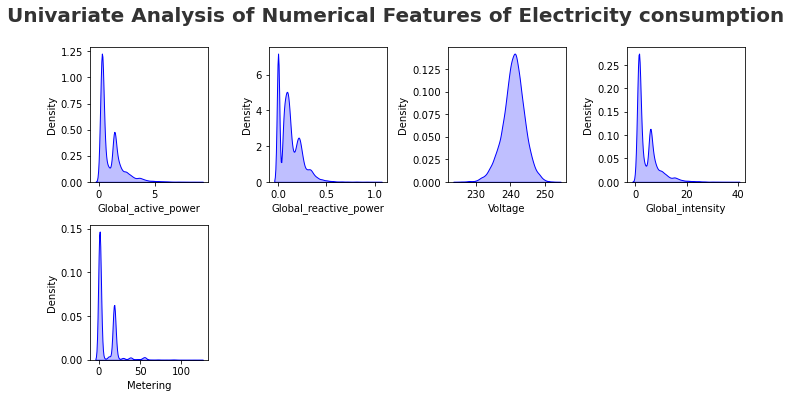

In [20]:
numeric_features=[fea for fea in df2.columns if df2[fea].dtypes!='O']

plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Electricity consumption', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_features)):    
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df2[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**** The distribution is  Gaussian with  right skewed  for all except Voltage is having Gaussian distribution

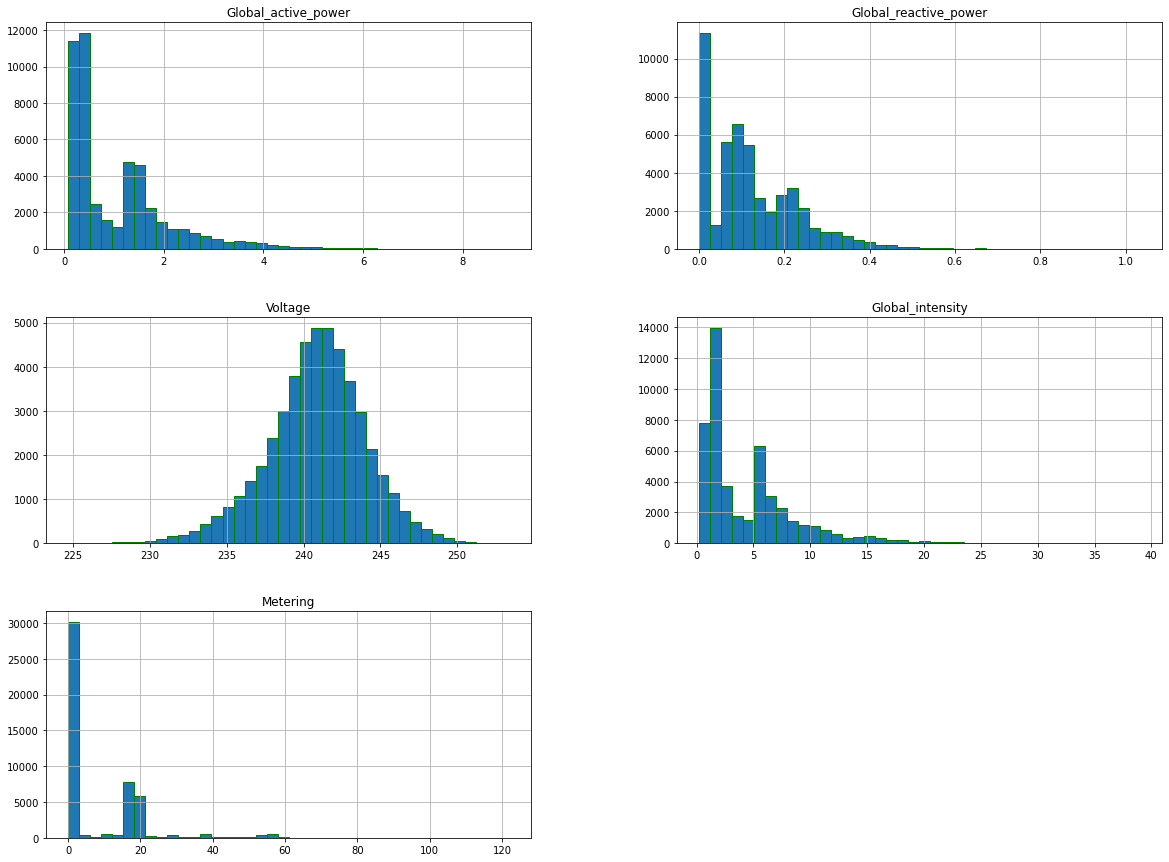

In [21]:

df2.hist(bins=40, figsize=(20,15), ec = 'g')
plt.show()

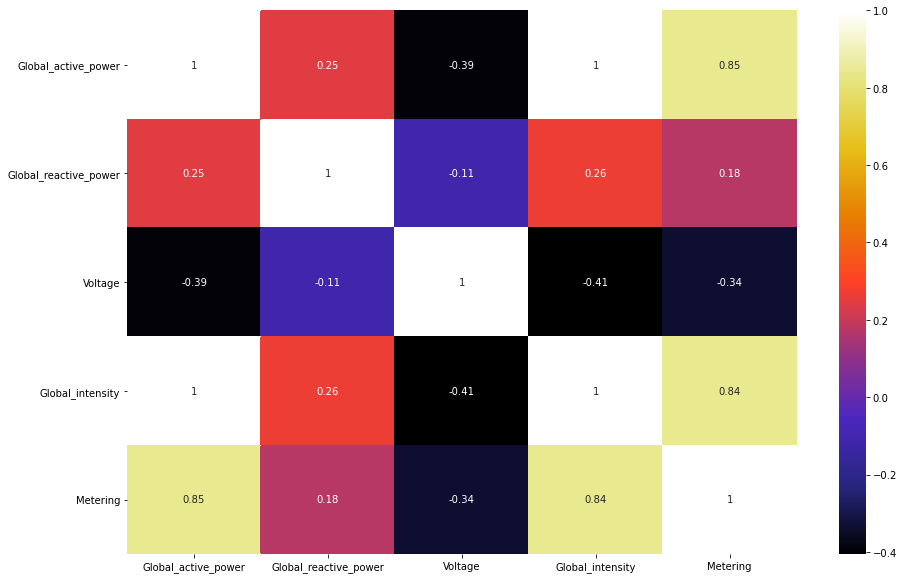

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(), cmap="CMRmap", annot=True)
plt.show()

#### Observations
* Global Active power .metering ,Global Intensity  are strongly correlated..
* Global reactive power is less correlated with other features but it must be considered to avoid loss in metering and revenue collection

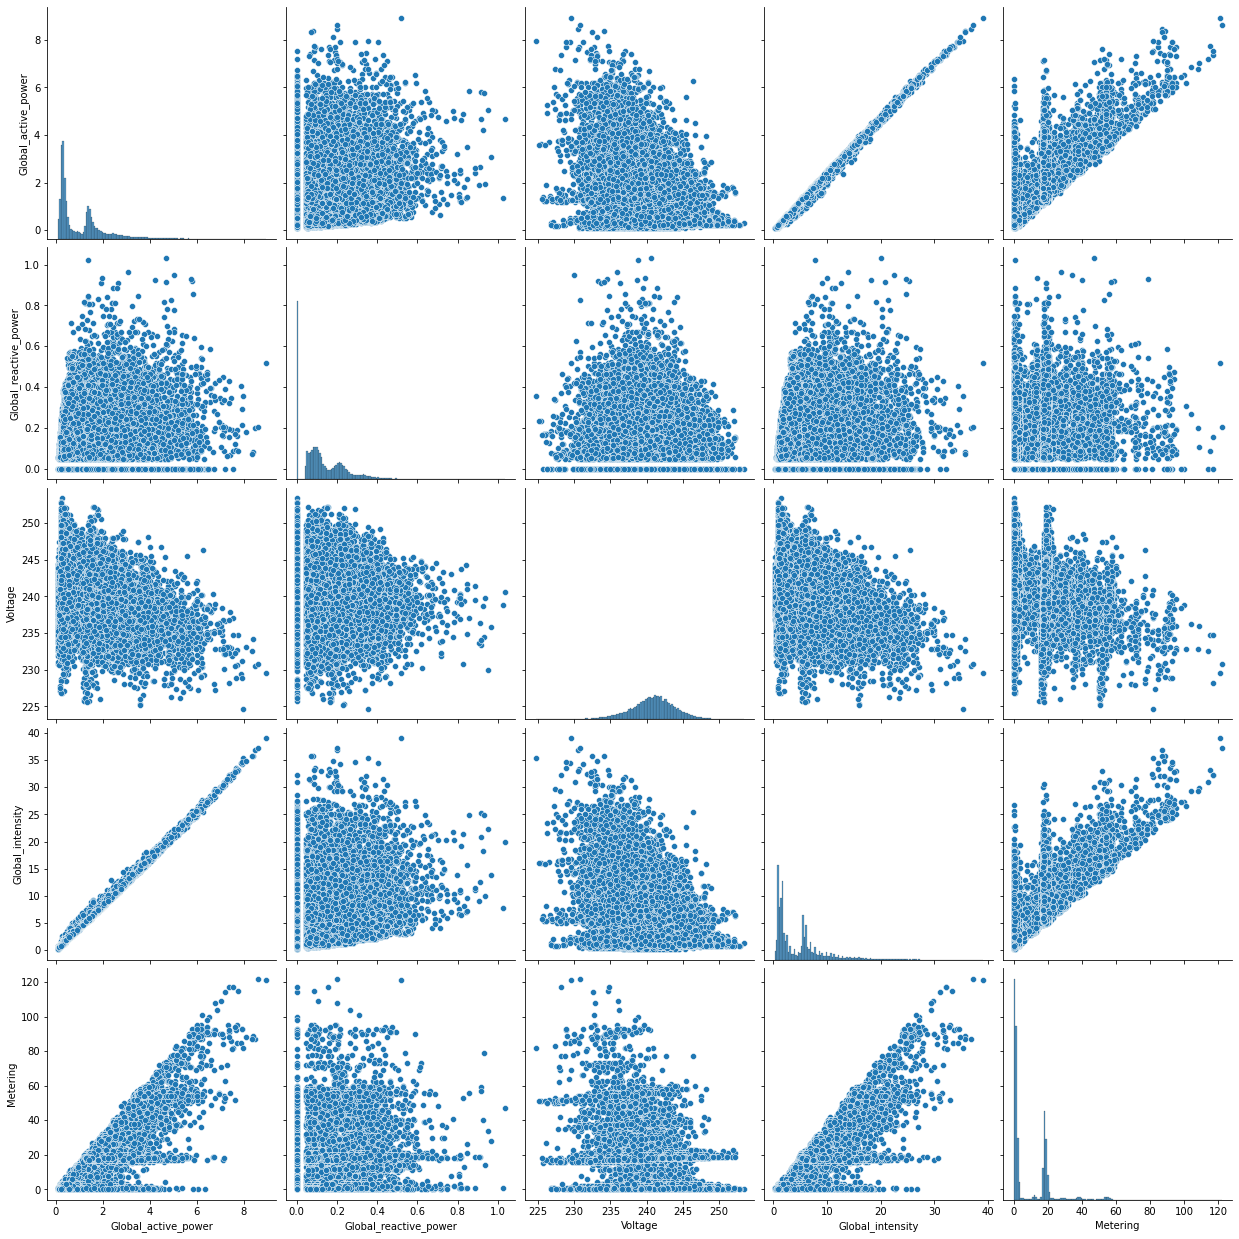

In [23]:
sns.pairplot(df2, height=3.5)

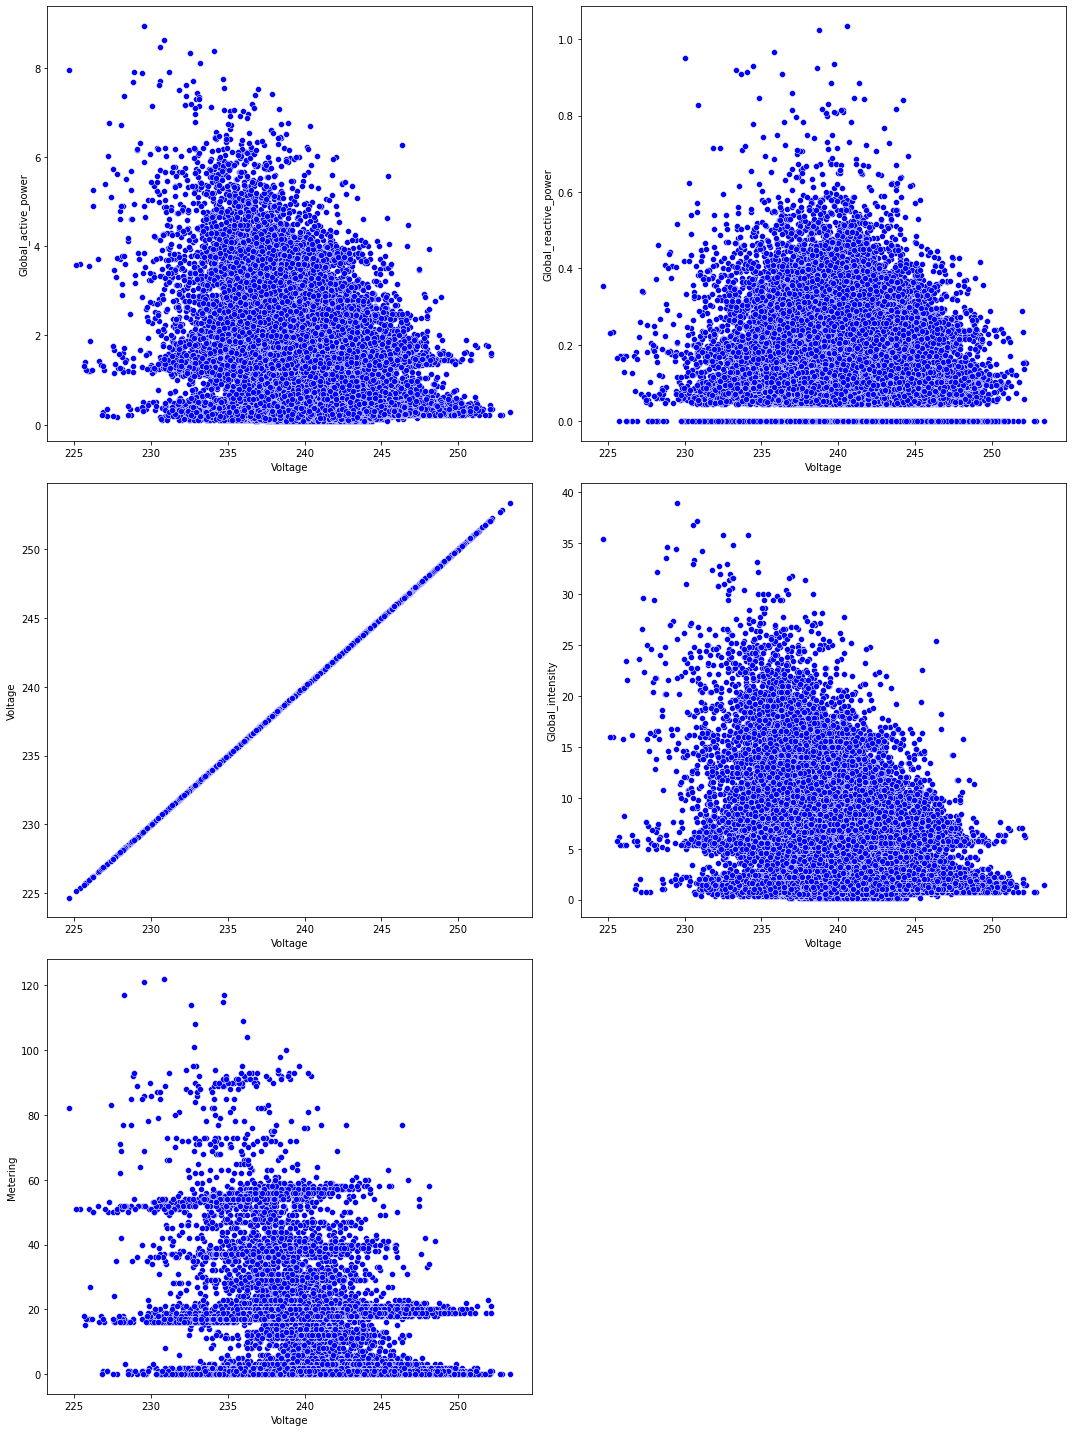

In [24]:
plt.figure(figsize=(15, 20))
for i in range(0,len(numeric_features)):
    ax = plt.subplot(3, 2, i+1)
    sns.scatterplot(data= df2 ,x= 'Voltage', y=numeric_features[i], color='b')
    plt.tight_layout()

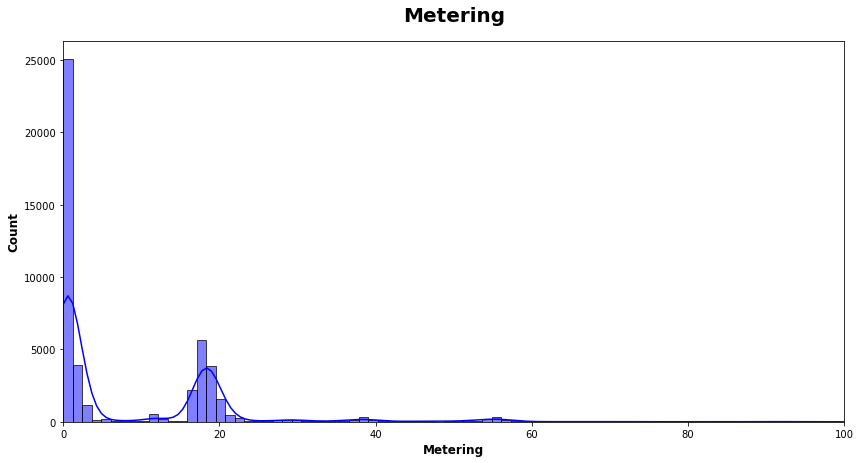

In [25]:
plt.subplots(figsize=(14,7))
sns.histplot(df2.Metering, bins=100, kde=True, color = 'b')
plt.title("Metering", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Metering", weight="bold", fontsize=12)
plt.xlim(0,100)
plt.show()

* From the chart it is clear that the Target Variable Skewed

Text(0.5, 1.0, 'Metering')

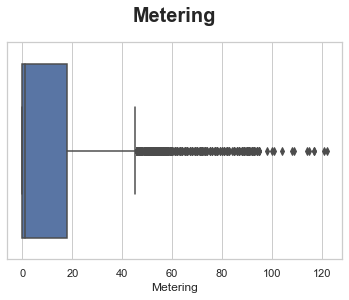

In [26]:
sns.set(style="whitegrid")
sns.boxplot(x =df2['Metering'])
plt.title("Metering", weight="bold",fontsize=20, pad=20)


Text(0.5, 1.0, 'Global_active_power')

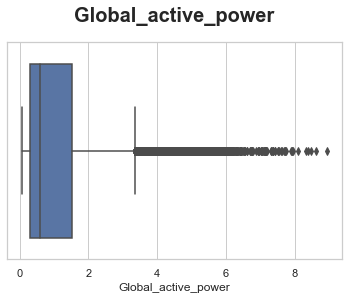

In [27]:
sns.boxplot(x =df2['Global_active_power'])
plt.title("Global_active_power", weight="bold",fontsize=20, pad=20)

Text(0.5, 1.0, 'Global_reactive_power')

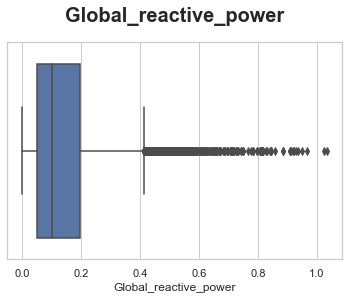

In [28]:
sns.boxplot(x =df2['Global_reactive_power'])
plt.title("Global_reactive_power", weight="bold",fontsize=20, pad=20)

Text(0.5, 1.0, 'Global_intensity')

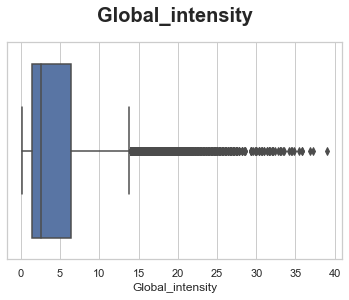

In [29]:
sns.boxplot(x =df2['Global_intensity'])
plt.title("Global_intensity", weight="bold",fontsize=20, pad=20)

Text(0.5, 1.0, 'Voltage')

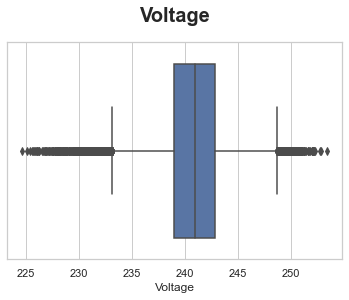

In [30]:
sns.boxplot(x =df2['Voltage'])
plt.title("Voltage", weight="bold",fontsize=20, pad=20)

#### The Boxplot clearly indicates the outliers are present in the each independent parameters which must be removed..



#### Data Preprocessing:
#### Imputation is applied using mean,median,mode,BFill,FFfill,interpolation....


In [31]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Metering
0,1.344,0.212,238.44,5.6,18.0
1,4.842,0.116,237.85,20.2,74.0
2,2.100,0.092,239.61,8.8,20.0
3,1.352,0.056,242.97,5.6,18.0
4,0.334,0.086,241.10,1.6,2.0
...,...,...,...,...,...
49995,3.238,0.000,232.16,14.0,16.0
49996,1.790,0.000,239.94,7.4,17.0
49997,1.518,0.070,240.17,6.2,18.0
49998,1.412,0.056,236.07,6.0,17.0


In [32]:
df2.isnull().sum().sum()
print('There are', df2.isnull().sum().sum(),'missing values in the dataset.' )

There are 8320 missing values in the dataset.


In [33]:
#### using median
df3=df2
for i in df3.columns:
    df3[i].fillna((df3[i].median()),inplace=True)

In [34]:
df3.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Metering                 0
dtype: int64

In [35]:
#### using mode
df4=df2
for i in df4.columns:
    df4[i].fillna((df4[i].mean()),inplace=True)


In [36]:
df4.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Metering                 0
dtype: int64

In [37]:
#### using mode
df5=df2
for i in df5.columns:
    df5[i].fillna((df5[i].mode()),inplace=True)

In [38]:
df5.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Metering                 0
dtype: int64

Text(0.5, 1.0, 'Metering')

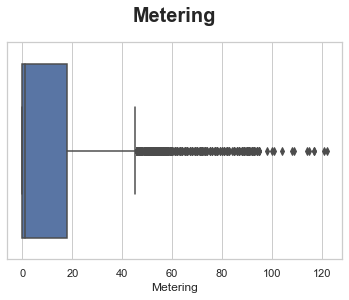

In [39]:
sns.set(style="whitegrid")
sns.boxplot(x =df4['Metering'])
plt.title("Metering", weight="bold",fontsize=20, pad=20)

Text(0.5, 1.0, 'Global_active_power')

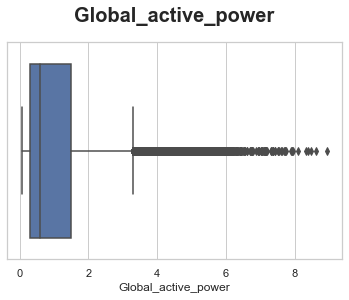

In [40]:
sns.boxplot(x =df4['Global_active_power'])
plt.title("Global_active_power", weight="bold",fontsize=20, pad=20)

Text(0.5, 1.0, 'Global_reactive_power')

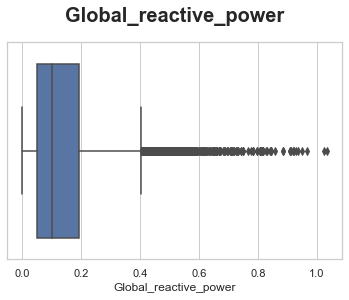

In [41]:
sns.boxplot(x =df4['Global_reactive_power'])
plt.title("Global_reactive_power", weight="bold",fontsize=20, pad=20)

Text(0.5, 1.0, 'Voltage')

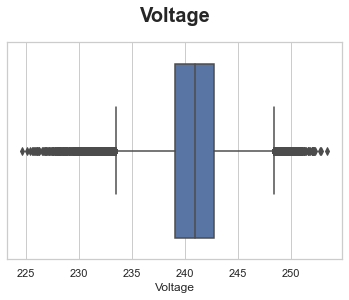

In [42]:
sns.boxplot(x =df4['Voltage'])
plt.title("Voltage", weight="bold",fontsize=20, pad=20)

#### Handling Outliers 

#### Techniques for outlier detection and removal:Z-score,IQR,Percentile

In [45]:
   
#### 
def ther_cal(df,vari):
    h_limit=df[vari].mean()+(3*df[vari].std())
    l_limit=df[vari].mean()-(3*df[vari].std())
    print(vari,':','upper_limit',h_limit,'lowerlimit',l_limit) 
    return l_limit,h_limit
    
        
def replace_with_limit_zscore(df,num_col):
    
    for vari in num_col:
        low_limit,up_limit=ther_cal(df,vari)
        df.loc[df[vari]<low_limit,vari]=low_limit
        df.loc[ df[vari]>up_limit,vari]=up_limit

In [46]:
###Df6 using Zscore
df6_zscore=df4
replace_with_limit_zscore(df6_zscore,df6_zscore.columns)

Global_active_power : upper_limit 3.9559979927727724 lowerlimit -1.8571691303084237
Global_reactive_power : upper_limit 0.44085681862143167 lowerlimit -0.19663428730204355
Voltage : upper_limit 250.24237730556877 lowerlimit 231.42240221793935
Global_intensity : upper_limit 16.60535233762089 lowerlimit -7.704015882742735
Metering : upper_limit 42.01156900478347 lowerlimit -25.567699254819


In [47]:
df6_zscore

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Metering
0,1.344000,0.212,238.44,5.600000,18.000000
1,3.955998,0.116,237.85,16.605352,42.011569
2,2.100000,0.092,239.61,8.800000,20.000000
3,1.352000,0.056,242.97,5.600000,18.000000
4,0.334000,0.086,241.10,1.600000,2.000000
...,...,...,...,...,...
49995,3.238000,0.000,232.16,14.000000,16.000000
49996,1.790000,0.000,239.94,7.400000,17.000000
49997,1.518000,0.070,240.17,6.200000,18.000000
49998,1.412000,0.056,236.07,6.000000,17.000000


In [48]:
#### CAl .IQR
def IQR_ther_cal(df,vari):
    Q1=df[vari].quantile(0.25)
    Q2=df[vari].quantile(0.75)
    IQR=Q2-Q1
    l_limit1=Q2 -(1.5*IQR)
    h_limit1=Q1+(1.5*IQR)
    print(vari,':','upper_limit',h_limit1,'lowerlimit',l_limit1) 
    return l_limit1,h_limit1   

#### replace with IQR
def replace_with_limit_IQR (df,num_col):
    for vari in num_col:
        IQ_low_limit,IQ_up_limit=IQR_ther_cal(df,vari)
        df.loc[df[vari]< IQ_low_limit,vari]= IQ_low_limit
        df.loc [df[vari]>IQ_up_limit,vari]=IQ_up_limit


In [49]:
###Df6 using Zscore
df7_IQR=df4.copy()
replace_with_limit_IQR(df7_IQR,df7_IQR.columns)

Global_active_power : upper_limit 2.0999999999999996 lowerlimit -0.2839999999999998
Global_reactive_power : upper_limit 0.263 lowerlimit -0.02100000000000002
Voltage : upper_limit 244.64499999999998 lowerlimit 237.185
Global_intensity : upper_limit 8.600000000000001 lowerlimit -1.0000000000000009
Metering : upper_limit 27.0 lowerlimit -9.0


In [50]:
df7_IQR

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Metering
0,1.344,0.212,238.440,5.6,18.0
1,2.100,0.116,237.850,8.6,27.0
2,2.100,0.092,239.610,8.6,20.0
3,1.352,0.056,242.970,5.6,18.0
4,0.334,0.086,241.100,1.6,2.0
...,...,...,...,...,...
49995,2.100,0.000,237.185,8.6,16.0
49996,1.790,0.000,239.940,7.4,17.0
49997,1.518,0.070,240.170,6.2,18.0
49998,1.412,0.056,237.185,6.0,17.0


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

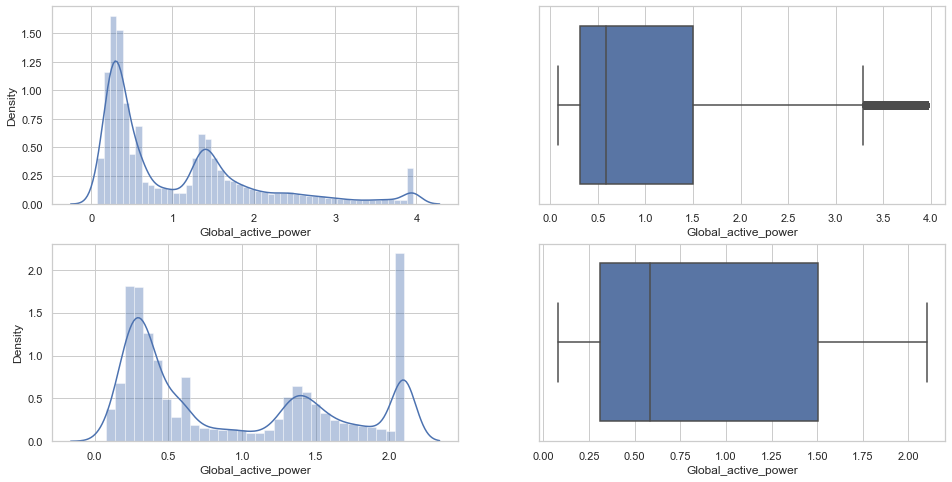

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_active_power'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_active_power'])
plt.subplot(2,2,3)
sns.distplot(df7_IQR['Global_active_power'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df7_IQR['Global_active_power'])
plt.show()



D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

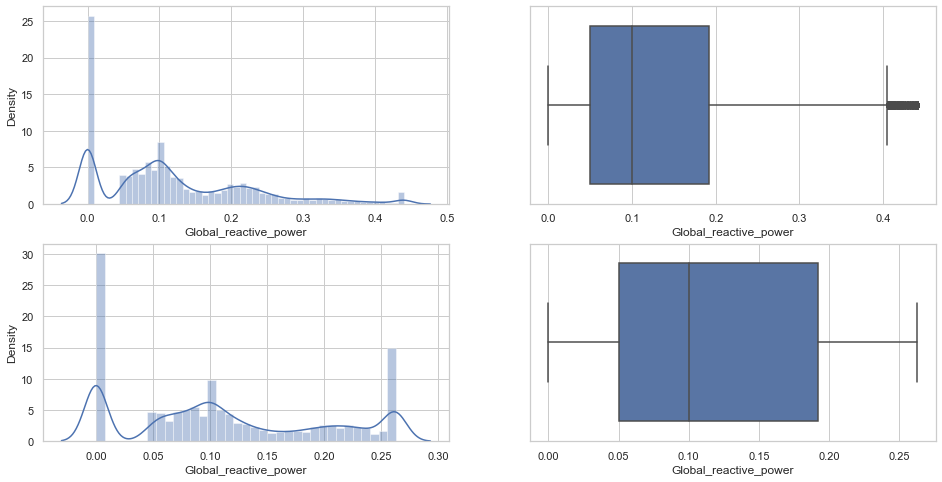

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_reactive_power'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_reactive_power'])
plt.subplot(2,2,3)
sns.distplot(df7_IQR['Global_reactive_power'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df7_IQR['Global_reactive_power'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

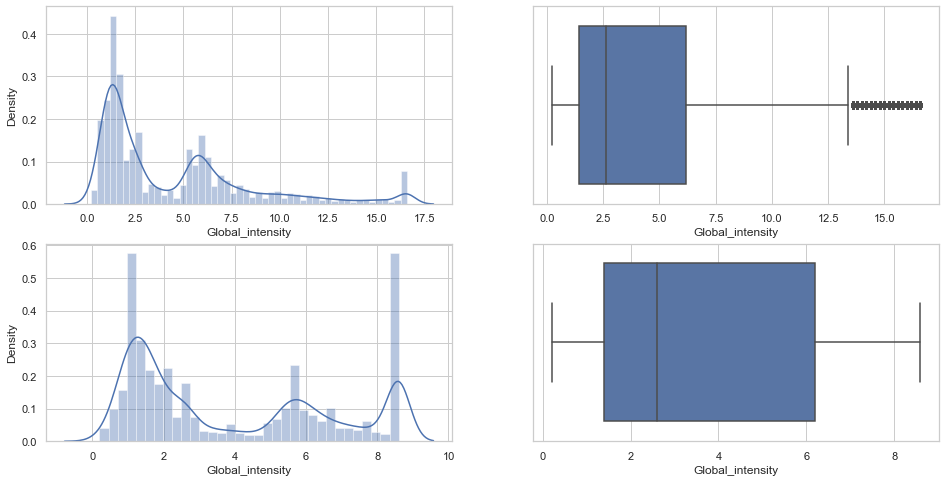

In [53]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_intensity'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_intensity'])
plt.subplot(2,2,3)
sns.distplot(df7_IQR['Global_intensity'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df7_IQR['Global_intensity'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

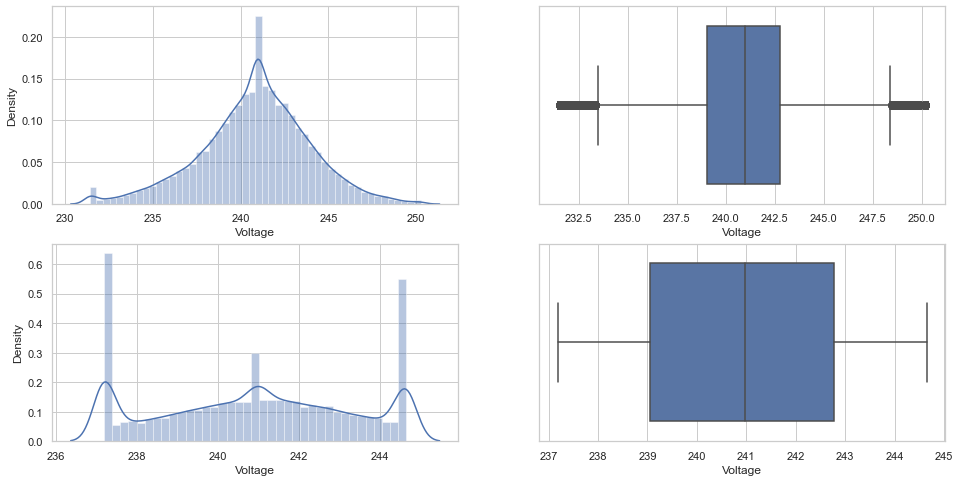

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Voltage'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Voltage'])
plt.subplot(2,2,3)
sns.distplot(df7_IQR['Voltage'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df7_IQR['Voltage'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

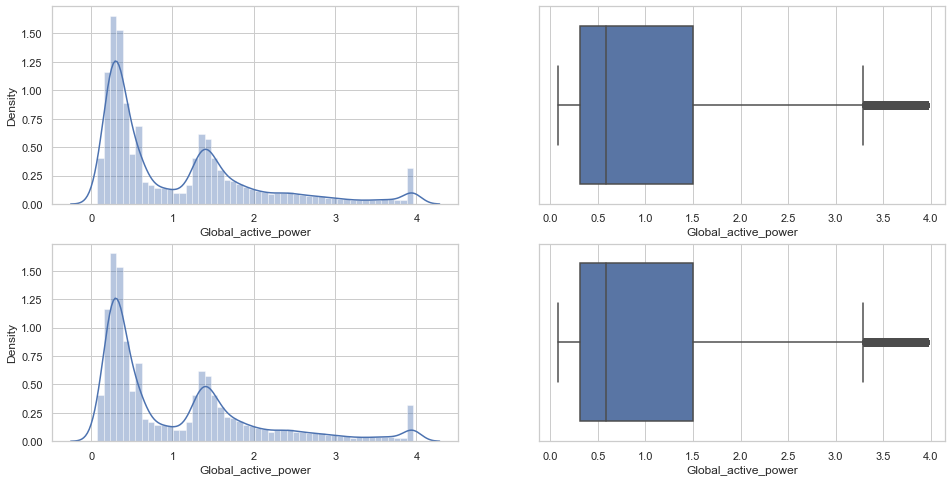

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_active_power'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_active_power'])
plt.subplot(2,2,3)
sns.distplot(df6_zscore['Global_active_power'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df6_zscore['Global_active_power'])
plt.show()


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

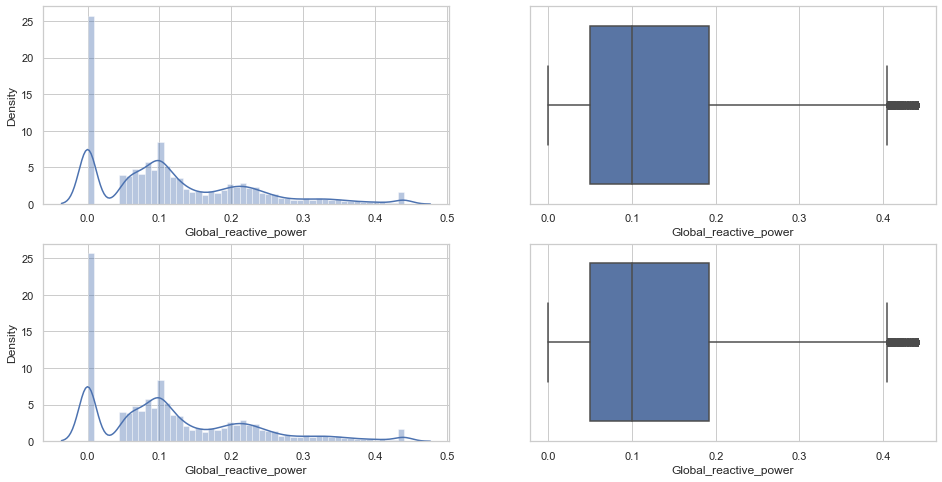

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_reactive_power'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_reactive_power'])
plt.subplot(2,2,3)
sns.distplot(df6_zscore['Global_reactive_power'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df6_zscore['Global_reactive_power'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

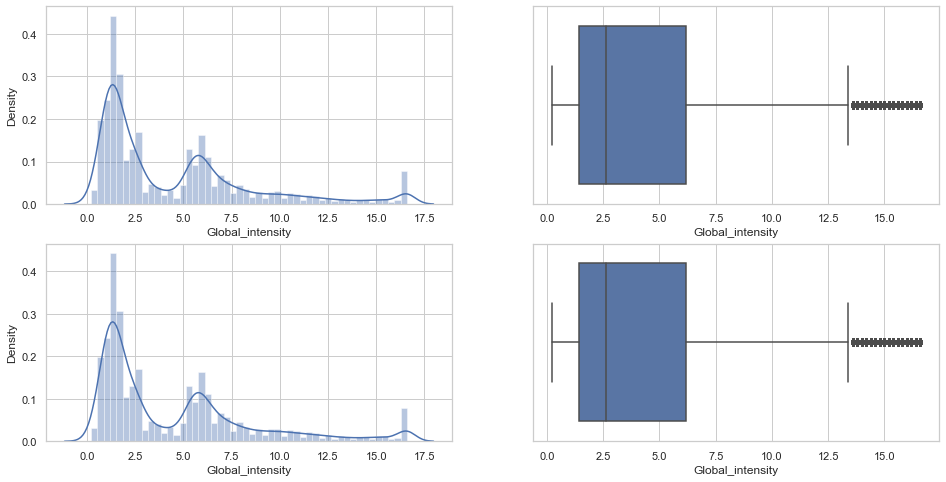

In [57]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_intensity'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_intensity'])
plt.subplot(2,2,3)
sns.distplot(df6_zscore['Global_intensity'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df6_zscore['Global_intensity'])
plt.show()


In [58]:
#Percentile :–# This technique works by setting a particular threshold value, which decides based on our problem statement.

#While we remove the outliers using capping, then that particular method is known as Winsorization.

#Here we always maintain symmetry on both sides means if remove 1% from the right then in the left we also drop by 1%.

In [59]:
#### CAl .IQR
def Perc_ther_cal(df,vari):
    h_limit3=df[vari].quantile(0.91)
    l_limit3=df[vari].quantile(0.09)
    print(vari,':','upper_limit',h_limit3,'lowerlimit',l_limit3) 
    return l_limit3,h_limit3   

#### replace with IQR
def replace_with_limit_IQR (df,num_col):
    for vari in num_col:
        Perc_low_limit, Perc_up_limit=Perc_ther_cal(df,vari)
        df.loc[df[vari]<  Perc_low_limit,vari]=  Perc_low_limit
        df.loc [df[vari]> Perc_up_limit,vari]= Perc_up_limit


In [60]:
###Df6 using Zscore
df8_percentile=df4.copy()
replace_with_limit_IQR(df8_percentile,df8_percentile.columns)

Global_active_power : upper_limit 2.53 lowerlimit 0.218
Global_reactive_power : upper_limit 0.276 lowerlimit 0.0
Voltage : upper_limit 244.82 lowerlimit 236.5
Global_intensity : upper_limit 10.6 lowerlimit 1.0
Metering : upper_limit 20.0 lowerlimit 0.0


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

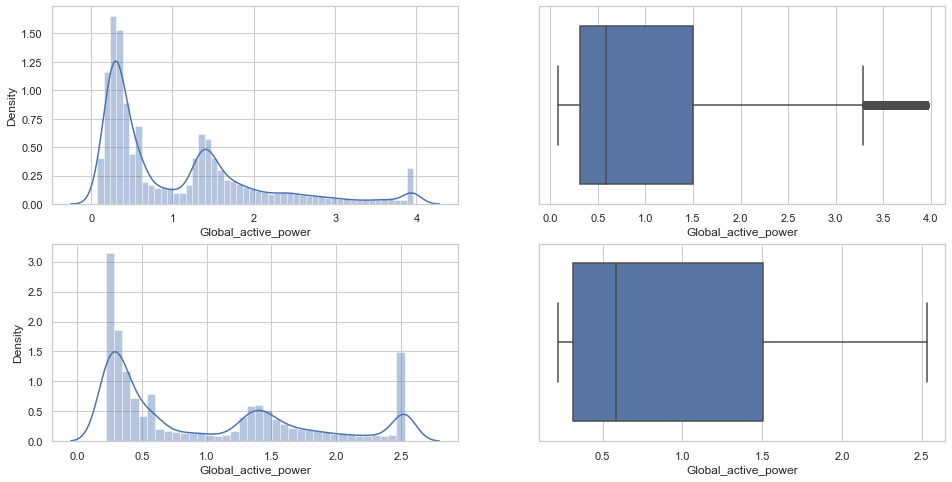

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_active_power'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_active_power'])
plt.subplot(2,2,3)
sns.distplot(df8_percentile['Global_active_power'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df8_percentile['Global_active_power'])
plt.show()


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

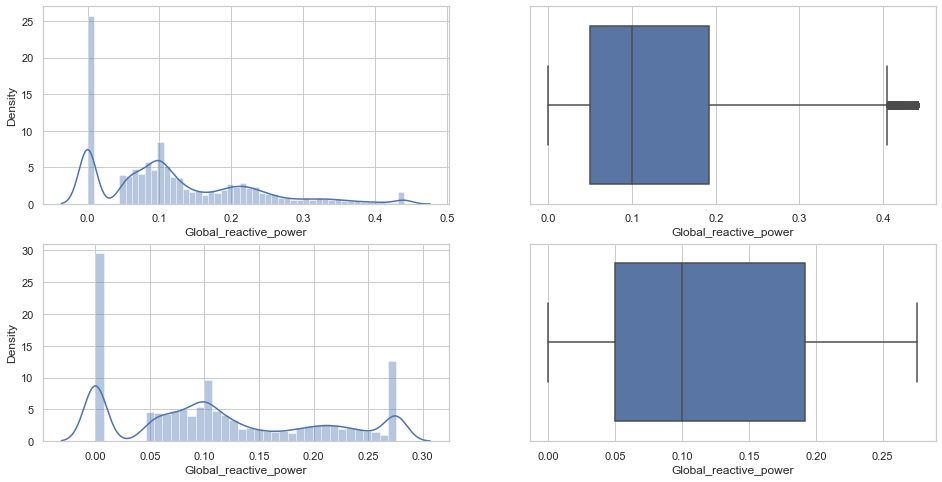

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_reactive_power'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_reactive_power'])
plt.subplot(2,2,3)
sns.distplot(df8_percentile['Global_reactive_power'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df8_percentile['Global_reactive_power'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

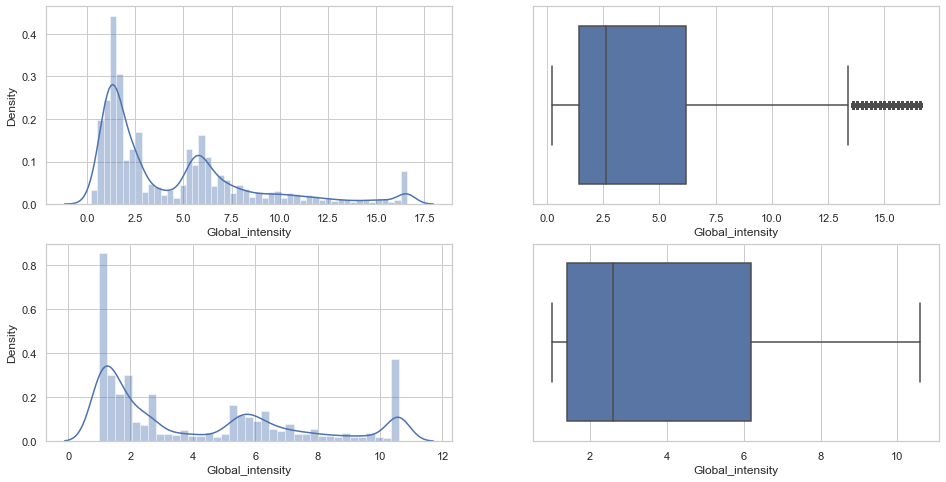

In [63]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Global_intensity'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Global_intensity'])
plt.subplot(2,2,3)
sns.distplot(df8_percentile['Global_intensity'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df8_percentile['Global_intensity'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Ana

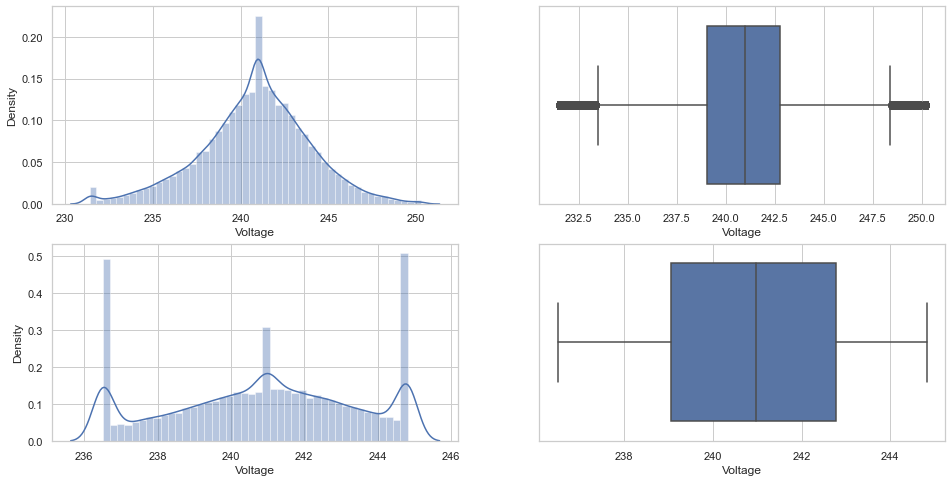

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df4['Voltage'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df4['Voltage'])
plt.subplot(2,2,3)
sns.distplot(df8_percentile['Voltage'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df8_percentile['Voltage'])
plt.show()

In [69]:
### saving the df
import pickle
# Writing different model files to file
with open( 'Elecricitybill analysis.sav', 'wb') as f:
    pickle.dump(df7_IQR,f)
    
##with open('sandardScalar.sav', 'wb') as f:
 ##   pickle.dump(scaler,f)

In [70]:
X=df7_IQR.iloc[:,:-1]
Y=df7_IQR.iloc[:,-1]

In [71]:
X.shape

(50000, 4)

In [72]:
Y.shape

(50000,)

In [73]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
X_train,X_test,Y_train,Y_test=train_test_split(
X,Y,test_size=0.33,random_state=42)

In [74]:
X_train.shape

(33500, 4)

In [75]:
Y_train.shape

(33500,)

In [76]:
scaler=StandardScaler()

In [77]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 


#Model Training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)  
reg_pred=regression.predict(X_test)
print("***** Linear Regression Results :*****")
print("Predicted:" ,reg_pred)

print('MSE:',mean_squared_error(Y_test,reg_pred))
print("MAE",mean_absolute_error(Y_test,reg_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,reg_pred)))
##r2
score=r2_score(Y_test,reg_pred)
print("R2:", score)
###N no of datapoints
N=len(Y_test)
P=X_test.shape[1]
## adjusted R2
adj_r2=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2:", adj_r2)

***** Linear Regression Results :*****
Predicted: [ 2.22247359  1.34496849  1.30617412 ...  2.10823989 -0.52263307
  1.86081968]
MSE: 25.662547408159384
MAE 3.3760356852843385
RMSE: 5.065821493909885
R2: 0.69957386606163
Adjusted R2: 0.6995010134071435


#### Ridge 

In [78]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,Y_train)
rig_pred=ridge.predict(X_test)
print('**** Ridge Results*****')
print('Predicated:',rig_pred)
print('MAE:',mean_squared_error(Y_test,rig_pred))
print('MSE:',mean_absolute_error(Y_test,rig_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,rig_pred)))
##r2
score1=r2_score(Y_test,rig_pred)
print("R2:", score1)
###N no of datapoints
N=len(Y_test)
P=X_test.shape[1]
## adjusted R2
adj_r2_ridge=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2:", adj_r2_ridge)

**** Ridge Results*****
Predicated: [ 2.21222255  1.35043596  1.30122903 ...  2.09274348 -0.53059543
  1.8639264 ]
MAE: 25.663120432153757
MSE: 3.3753214385431454
RMSE: 5.065878051449102
R2: 0.699567157788264
Adjusted R2: 0.6995010134071435


#### Lasso

In [79]:

from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)
lasso_pred=lasso.predict(X_test)
print('**** Lasso Results*****')
print('Predicated:',lasso_pred)
print('MAE:',mean_squared_error(Y_test,lasso_pred))
print('MSE:',mean_absolute_error(Y_test,lasso_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,lasso_pred)))
##r2
score2=r2_score(Y_test,rig_pred)
print("R2:", score2)
###N no of datapoints
N=len(Y_test)
P=X_test.shape[1]
## adjusted R2
adj_r2_lasso=1-(1-score2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2:", adj_r2_lasso)

**** Lasso Results*****
Predicated: [ 1.98266735  1.48721911  1.20520474 ...  1.72876647 -0.72935895
  1.9609939 ]
MAE: 25.836788750885873
MSE: 3.3767961079344406
RMSE: 5.082990138775195
R2: 0.699567157788264
Adjusted R2: 0.6994943035070365


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+03, tolerance: 2.883e+02
  model = cd_fast.enet_coordinate_descent(


In [80]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.0001)
elasticnet.fit(X_train,Y_train)
elasticnet_pred=elasticnet.predict(X_test)
print('**** Elastic net Results*****')
print('Predicated:',elasticnet_pred)
print('MAE:',mean_squared_error(Y_test,elasticnet_pred))
print('MSE:',mean_absolute_error(Y_test,elasticnet_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,elasticnet_pred)))
##r2
score3=r2_score(Y_test,elasticnet_pred)
print("R2:", score3)
###N no of datapoints
N=len(Y_test)
P=X_test.shape[1]
## adjusted R2
adj_r2_elstic=1-(1-score3)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2:", adj_r2_elstic)


**** Elastic net Results*****
Predicated: [ 2.18359613  1.36655017  1.28786865 ...  2.05000334 -0.5518232
  1.87307716]
MAE: 25.667730357186688
MSE: 3.373784122275621
RMSE: 5.066333028649685
R2: 0.6995131903495151
Adjusted R2: 0.6994403229813064


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.069e+05, tolerance: 2.883e+02
  model = cd_fast.enet_coordinate_descent(


#### Support Vector Regression

In [ ]:

from sklearn.svm import SVR
model=SVR()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)
y_pred_SVR=model.predict(X_test)
y_pred_SVR


print('**** SVR Results using RBF Kernal*****')
print('Predicated:',y_pred_SVR)
print('MAE:',mean_squared_error(Y_test,y_pred_SVR))
print('MSE:',mean_absolute_error(Y_test,y_pred_SVR))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,y_pred_SVR)))
##r2
score4=r2_score(Y_test,y_pred_SVR)
print("R2:", score4)
###N no of datapoints
N=len(Y_test)
P=X_test.shape[1]
## adjusted R2
adj_r2_y_pred_SVR=1-(1-score4)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2:", adj_r2_y_pred_SVR)


#### Observations:
***** Linear Regression Results :*****
Predicted: [20.16826079 21.19766274 19.21154072 ... -0.27659964  0.75672994
 -0.68341759]
MSE: 25.06074775558949
MAE 3.3659184557274577
RMSE: 5.006071089745879
R2: 0.7087806591950152
Adjusted R2: 0.7087100391669328    


**** Ridge Results*****
Predicated: [20.1768964  21.18125221 19.21978013 ... -0.26927341  0.74301094
 -0.68262396]
MAE: 25.059904642106325
MSE: 3.36509325793605
RMSE: 5.005986879937494
R2: 0.7087904566262484
Adjusted R2: 0.7087100391669328

**** Lasso Results*****
Predicated: [20.38102415 20.80873169 19.42676038 ... -0.09746138  0.44545618
 -0.70385236]
MAE: 25.17926638499595
MSE: 3.3599567876492467
RMSE: 5.0178946167686655
R2: 0.7087904566262484
Adjusted R2: 0.7087198389740208


**** Elastic net Results*****
Predicated: [20.19922991 21.13745137 19.23988701 ... -0.25045523  0.70883847
 -0.68069038]
MAE: 25.060169959352205
MSE: 3.363172790646964
RMSE: 5.006013379861485
R2: 0.7087873734974368
Adjusted R2: 0.7087167550975575


**** SVR Results*****
Predicated: [17.99944802 22.36922968 20.06972197 ...  1.32082823  0.4291414
  0.08719733]
MAE: 23.752695795777125
MSE: 2.371092001950666
RMSE: 4.87367374736729
R2: 0.7239809250925187
Adjusted R2: 0.7239139910943598

*** Results shows that SVR outperforms wrt MSE ,MAE,RMSE ,R2 and adjusted R2